In [1]:
from utilities.evaluator import Evaluator
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm
from utilities.misc import dict_to_json
%load_ext autoreload
%autoreload 2

In [2]:
from utilities.variational import VQE
from utilities.evaluator import Evaluator
from utilities.idinserter import IdInserter
from utilities.simplifier import Simplifier
from utilities.unitary_killer import UnitaryMurder




In [78]:
import pickle

In [84]:
'H4/N8_geometry_H4_multip_[(H, (0.0, 0.0, 0.0)), (H, (0.0, 0.0, 1.)), (H, (0.0, 0.0, 3.4)), (H, (0.0, 0.0, 5.1))]_charge_1_basis0_quiet'

'H4/N8_geometry_H4_multip_[(H, (0.0, 0.0, 0.0)), (H, (0.0, 0.0, 1.7)), (H, (0.0, 0.0, 3.4)), (H, (0.0, 0.0, 5.1))]_charge_1_basis0_quiet'

In [81]:
with open(evaluator.path+evaluator.identifier+"/run_0/raw_history.pkl", "rb") as f:
    gg=pickle.load(f)

'H4/N8_geometry_H4_multip_[(H, (0.0, 0.0, 0.0)), (H, (0.0, 0.0, 1.7)), (H, (0.0, 0.0, 3.4)), (H, (0.0, 0.0, 5.1))]_charge_1_basis0_quiet'

In [ ]:
#path="/data/uab-giq/scratch/matias/data-vans/"
path = "../data-vans/"
nconts=[]
fcis=[]
bads=0
nparams=[]
lowestenergy=[]
for bond in tqdm(np.arange(0.25,1.75,0.05)):
    bond = np.round(bond,2)
    problem_config ={"problem" : "H4", "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                        ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))], 
                       "multiplicity":1, "charge":0, "basis":"sto-3g"}
    q=8
    vqe_handler = VQE(n_qubits=q, lr=0.01, epochs=2000,
                        noise_config={}, problem_config=problem_config,
                        patience=200, random_perturbations=True, 
                      return_lower_bound=1, optimizer="adam")

    fci = vqe_handler.lower_bound_energy - 0.0016
    fcis.append(fci)

    pp ={"problem" : "H4", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                            ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))]).replace("'",""), 
                       "multiplicity":1, "charge":0, "basis":"sto-3g"}

    arguss= {"n_qubits":8,"problem_config":pp, "noise_config":{}}
    
    evaluator = Evaluator(args=arguss,loading=True,path="{}".format(path))
    
    except Exception:
        print("problem with {}".format(bond))

In [83]:
bond=0.45

problem_config ={"problem" : "H4", "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                    ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))], 
                   "multiplicity":1, "charge":0, "basis":"sto-3g"}
q=8
vqe_handler = VQE(n_qubits=q, lr=0.01, epochs=2000,
                    noise_config={}, problem_config=problem_config,
                    patience=200, random_perturbations=True, 
                  return_lower_bound=1, optimizer="adam")

fci = vqe_handler.lower_bound_energy - 0.0016
fcis.append(fci)

pp ={"problem" : "H4", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                        ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))]).replace("'",""), 
                   "multiplicity":1, "charge":0, "basis":"sto-3g"}

arguss= {"n_qubits":8,"problem_config":pp, "noise_config":{}}
evaluator = Evaluator(args=arguss,loading=True,path="{}".format(path))


EOFError: Ran out of input

In [22]:
#path="/data/uab-giq/scratch/matias/data-vans/"
path = "../data-vans/"
nconts=[]
fcis=[]
bads=0
nparams=[]
lowestenergy=[]
for bond in tqdm(np.arange(0.25,1.75,0.05)):
    bond = np.round(bond,2)
    try:
        problem_config ={"problem" : "H4", "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                            ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))], 
                           "multiplicity":1, "charge":0, "basis":"sto-3g"}
        q=8
        vqe_handler = VQE(n_qubits=q, lr=0.01, epochs=2000,
                            noise_config={}, problem_config=problem_config,
                            patience=200, random_perturbations=True, 
                          return_lower_bound=1, optimizer="adam")

        fci = vqe_handler.lower_bound_energy - 0.0016
        fcis.append(fci)

        pp ={"problem" : "H4", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond)),
                                                ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))]).replace("'",""), 
                           "multiplicity":1, "charge":0, "basis":"sto-3g"}

        arguss= {"n_qubits":8,"problem_config":pp, "noise_config":{}}
        evaluator = Evaluator(args=arguss,loading=True,path="{}".format(path))
        nconts.append(evaluator.number_cnots_best())
        nparams.append(len(evaluator.evolution[evaluator.get_best_iteration()[0]][2]))
        lowestenergy.append(evaluator.evolution[evaluator.get_best_iteration()[0]][4])

    except Exception:
        print("problem with {}".format(bond))

 17%|█▋        | 5/30 [01:06<04:59, 11.99s/it]

problem with 0.45


 47%|████▋     | 14/30 [03:07<03:03, 11.44s/it]

problem with 0.9


 57%|█████▋    | 17/30 [03:40<02:09,  9.96s/it]

problem with 1.05


 60%|██████    | 18/30 [03:42<01:32,  7.74s/it]

problem with 1.1


 67%|██████▋   | 20/30 [03:57<01:11,  7.13s/it]

problem with 1.2


 70%|███████   | 21/30 [03:59<00:51,  5.67s/it]

problem with 1.25


 73%|███████▎  | 22/30 [04:02<00:37,  4.70s/it]

problem with 1.3


 77%|███████▋  | 23/30 [04:04<00:27,  3.96s/it]

problem with 1.35


 80%|████████  | 24/30 [04:06<00:20,  3.46s/it]

problem with 1.4


 83%|████████▎ | 25/30 [04:09<00:15,  3.12s/it]

problem with 1.45


 87%|████████▋ | 26/30 [04:11<00:11,  2.86s/it]

problem with 1.5


 93%|█████████▎| 28/30 [04:26<00:09,  4.82s/it]

problem with 1.6


 97%|█████████▋| 29/30 [04:28<00:03,  3.98s/it]

problem with 1.65


100%|██████████| 30/30 [04:39<00:00,  9.31s/it]


In [73]:
len(evaluator.raw_history.keys())

1336

In [72]:
len(evaluator.evolution.keys())

556

In [46]:
bds=np.round(np.arange(.25,1.75,.05),2)
posi=[]
positions = np.array([0.45, 0.9, 1.05, 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.6, 1.65])
for k in range(len(positions)):
    posi.append(np.squeeze(np.where(bds == positions[k])))

In [47]:
fcits=[]
bdd=[]
for ind, o in enumerate(fcis):
    if ind in posi:
        pass
    else:
        fcits.append(o)
        bdd.append(bds[ind])

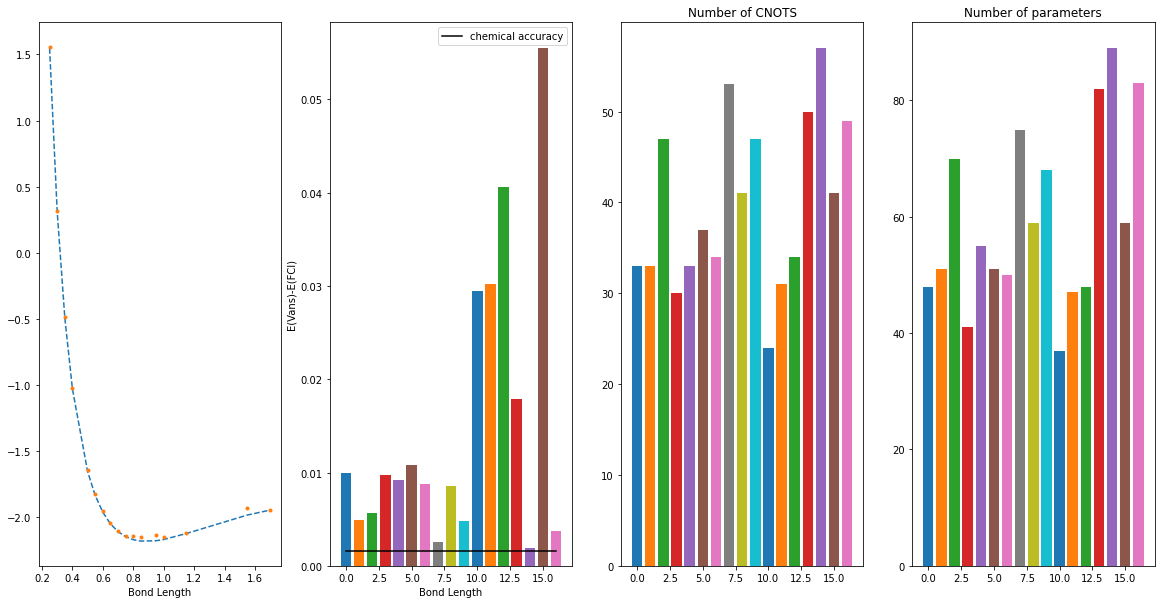

In [88]:
plt.figure(figsize=(20,10))

ax1, ax2,ax3,ax4 = [plt.subplot2grid((1,4),(0,k)) for k in range(4)]

plt.title(r'$H_4$')
ax1.plot(bdd,np.array(fcits),'--', label="FCI")
ax1.plot(bdd,np.array(lowestenergy),'.',label="VAns")
ax1.set_xlabel("Bond Length")

diff = np.array(lowestenergy)-np.array(fcits)
for i, v in enumerate(diff):
    ax2.bar(i,v)
ax2.set_ylabel("E(Vans)-E(FCI)")
ax2.plot(np.ones(len(diff))*0.0016, color="black", label="chemical accuracy")
ax2.set_xlabel("Bond Length")
ax2.legend()

ax3.set_title("Number of CNOTS")
for i, v in enumerate(nconts):
    ax3.bar(i,v)
    
ax4.set_title("Number of parameters")
for i, v in enumerate(nparams):
    ax4.bar(i,v)
    
plt.savefig("H4_molecule.png")

In [42]:
np.array(lowestenergy)-np.array(fcits)

array([0.00996798, 0.00491226, 0.00566858, 0.00973936, 0.00924967,
       0.01084246, 0.00880931, 0.00259689, 0.00855147, 0.00480152,
       0.0294475 , 0.03021752, 0.04059683, 0.01792083, 0.00190773,
       0.05551249, 0.00376396])

In [35]:
len(np.array(lowestenergy))

17

In [131]:
nconts = np.array(nconts)
lowestenergy=np.array(lowestenergy)
nparams=np.array(nparams)
np.save("resuh4run/nconts",nconts)
np.save("resuh4run/nparams",nparams)
np.save("resuh4run/lowestenergy",lowestenergy)


In [8]:
nconts=np.load("resuh4run/nconts.npy")
nparams=np.load("resuh4run/nparams.npy")
lowestenergy=np.load("resuh4run/lowestenergy.npy")

In [9]:
np.sort(lowestenergy)

array([-1.9949881, -1.994915 , -1.9947252, -1.994151 , -1.9940431,
       -1.9904932, -1.9817305, -1.9790623, -1.9790249, -1.9779917,
       -1.9752166, -1.9750679, -1.9678845, -1.9676579, -1.9657737,
       -1.965331 , -1.9653306, -1.965158 , -1.9650952, -1.9645276,
       -1.96279  , -1.962275 , -1.9559717, -1.9534771, -1.9525874,
       -1.9451331, -1.94497  , -1.943763 , -1.9320862, -1.9306335,
       -1.9253795, -1.9200417, -1.9181707, -1.9162221, -1.9160621,
       -1.9150822, -1.912723 , -1.9122819, -1.9118679, -1.9098502,
       -1.9098444, -1.9098265, -1.9079826, -1.9078243, -1.8977007,
       -1.8956885, -1.8875704, -1.8866643, -1.8844371, -1.8819506,
       -1.880651 , -1.8699474, -1.8671525, -1.8658078, -1.8636953,
       -1.8521333, -1.8509231, -1.8418158, -1.8418138, -1.8329873,
       -1.8302209, -1.822129 , -1.8132709, -1.8132707, -1.8132706,
       -1.8132463, -1.8095202, -1.8080587, -1.7940155, -1.7924225,
       -1.7924224, -1.7924223, -1.786678 , -1.7744936, -1.7404

In [20]:
nconts=np.sort(np.load("resuh4run/nconts.npy"))
nparams=np.sort(np.load("resuh4run/nparams.npy"))
lowestenergy=np.sort(np.load("resuh4run/lowestenergy.npy"))

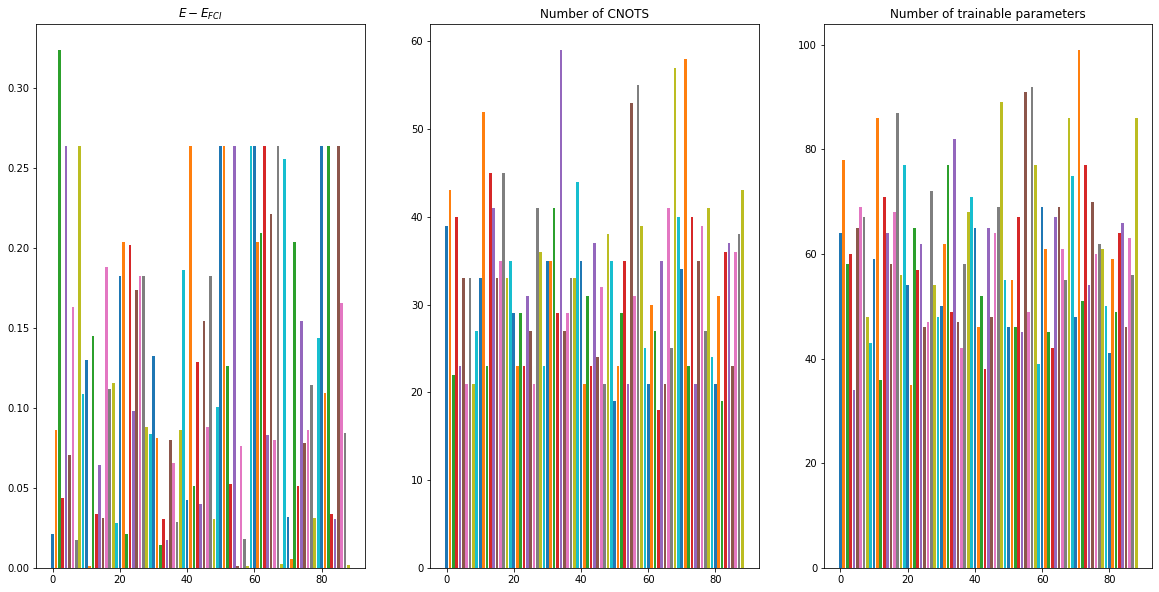

In [14]:
plt.figure(figsize=(20,10))
plt.title("H-H-H-H\nBond-length 1.5 A")
ax = [plt.subplot2grid((1,3), (0,k)) for k in range(3)]

for k, arr in zip(range(3), [lowestenergy,nconts,nparams]):
    for v,b in enumerate(arr):
        if k==0:
            ax[k].bar(v,b-fci)
        else:
            ax[k].bar(v,b)
        ax[k].set_title([r'$E-E_{FCI}$', "Number of CNOTS","Number of trainable parameters"][k])
#plt.savefig("h4_better_results.png")

In [18]:
np.sort(lowestenergy-(fci+0.0016))

array([-4.37736511e-04, -3.64661217e-04, -1.74880028e-04,  3.99351120e-04,
        5.07235527e-04,  4.05716896e-03,  1.28198862e-02,  1.54880285e-02,
        1.55254602e-02,  1.65586472e-02,  1.93337202e-02,  1.94824934e-02,
        2.66658068e-02,  2.68924236e-02,  2.87766457e-02,  2.92193890e-02,
        2.92197466e-02,  2.93923616e-02,  2.94551849e-02,  3.00227404e-02,
        3.17603350e-02,  3.22753191e-02,  3.85786295e-02,  4.10732031e-02,
        4.19629812e-02,  4.94172573e-02,  4.95803356e-02,  5.07873297e-02,
        6.24641180e-02,  6.39168024e-02,  6.91708326e-02,  7.45086670e-02,
        7.63796568e-02,  7.83282518e-02,  7.84882307e-02,  7.94681311e-02,
        8.18274021e-02,  8.22684765e-02,  8.26824903e-02,  8.47001076e-02,
        8.47059488e-02,  8.47238302e-02,  8.65677595e-02,  8.67260695e-02,
        9.68496799e-02,  9.88618135e-02,  1.06979966e-01,  1.07886076e-01,
        1.10113263e-01,  1.12599730e-01,  1.13899350e-01,  1.24602914e-01,
        1.27397895e-01,  

In [106]:
positions = np.where(lowestenergy-chemac < 0)

In [13]:
lowestenergy[positions]-fci

NameError: name 'positions' is not defined

-1.9929503255188075

In [4]:
circ, energy, indexed_circuit,resolver, lowest_energy = evaluator.evolution[len(evaluator.evolution.keys())-1]
itsen=[]
itslen=[]
ncnots=[]
nparams=[]
for k in tqdm(range(len(evaluator.evolution.keys()))):
    things = evaluator.evolution[k]
    itsen.append(things[1])
    itslen.append(things[-1])
    ncnots.append(vqe_handler.count_cnots(things[2]))
    nparams.append(len(things[2]) - ncnots[-1])
    if evaluator.evolution[k][1] == lowest_energy:
        pcirc, penergy, pindexed_circuit,presolver, plowest_energy = things

100%|██████████| 63/63 [00:00<00:00, 11658.56it/s]


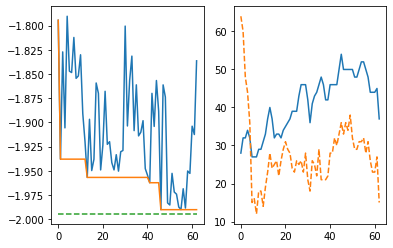

In [5]:
ax1, ax2 = [plt.subplot2grid((1,2),(0,k)) for k in range(2)]
ax1.plot(itsen, label="energy of current circuit")
ax1.plot(itslen, label="lowest found")
ax1.plot(np.ones(len(itslen))*vqe_handler.lower_bound_energy,'--', label="FCI")

ax2.plot(ncnots)
ax2.plot(nparams,'--')

Let's try now to add gates to the circuit, so it converges :) 

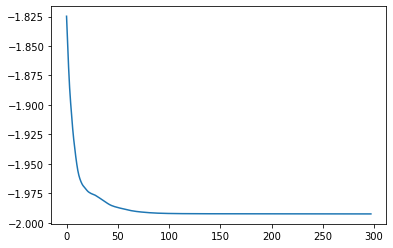

In [62]:
energy, symbol_to_value, training_evolution = vqe_handler.vqe(pindexed_circuit, symbols_to_values=presolver) #compute energy
plt.plot(training_evolution.history["energy"])

In [94]:
def gate_counter_on_qubits(self, indexed_circuit):
    ngates = {k:[0,0] for k in range(len(self.qubits))}
    for ind in indexed_circuit:
        if ind < self.number_of_cnots:
            control, target = self.indexed_cnots[str(ind)]
            ngates[control][1]+=1
            ngates[target][1]+=1   
        else:
            qind = (ind-self.number_of_cnots)%self.n_qubits
            ngates[qind][0]+=1
    return ngates

In [93]:
gate_counter(vqe_handler, indexed_circuit)

{0: [3, 7],
 1: [2, 4],
 2: [1, 6],
 3: [1, 10],
 4: [1, 14],
 5: [2, 12],
 6: [1, 12],
 7: [4, 9]}

In [107]:
def choose_qubit_from_N1q(self, beta=10):
    """
    Note that beta could be annealed as energy decreases.. (at beta = 0 we get uniform sampling)
    function that selects qubit according to how many gates are acting on each one in the circuit
    """
    gc=np.array(list(ngates.values()))[:,0] #### gives the gate population for each qubit
    probs=np.exp(beta*(1-gc/np.sum(gc)))/np.sum(np.exp(beta*(1-gc/np.sum(gc))))
    return np.random.choice(range(vqe_handler.n_qubits),1,p=probs)[0]

In [112]:
gc=np.array(list(ngates.values()))[:,1] #### gives the gate population for each qubit
probs=np.exp(beta*(1-gc/np.sum(gc)))/np.sum(np.exp(beta*(1-gc/np.sum(gc))))

In [124]:
np.random.choice(range(vqe_handler.n_qubits),2,p=probs, replace=False)

array([3, 0])

In [55]:
circuit = vqe_handler.give_circuit(indexed_circuit)[0]


TypeError: operation_at() missing 1 required positional argument: 'moment_index'

In [63]:
import cirq

False

In [ ]:
iid.inserter(indexed_circuit,resolver,-1)